<a href="https://colab.research.google.com/github/ptsurko/ml-notebooks/blob/master/Linear_Regression_House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "pavelkey" # username from the json file
os.environ['KAGGLE_KEY'] = "2d38d31c6d5bdc84afc023ad38f79088" # key from the json file

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import zipfile

import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
!kaggle datasets download -d harlfoxem/housesalesprediction # api copied from kaggle

zipref = zipfile.ZipFile('/content/housesalesprediction.zip', 'r')
zipref.extractall()
zipref.close()

data = pd.read_csv('./kc_house_data.csv')

housesalesprediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [79]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [80]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [0]:
data_cleaned = data.drop(['id','date'], axis = 1)
data_cleaned = data_cleaned[data_cleaned['bedrooms'] < 33]

# Single feature regression

In [0]:
X = data_cleaned.iloc[:,1].values.reshape(-1, 1)
y = data_cleaned.iloc[:,0]

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print('score: ', reg.score(X_test, y_test))

print('Coef     : ', reg.coef_)
print('Intercept: ', reg.intercept_)

y_pred = reg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

score:  0.09053261891364373
Coef     :  [129736.40108627]
Intercept:  104155.57602556684
Mean Absolute Error: 221268.61266505445
Mean Squared Error: 111004931714.26152
Root Mean Squared Error: 333174.0261699005


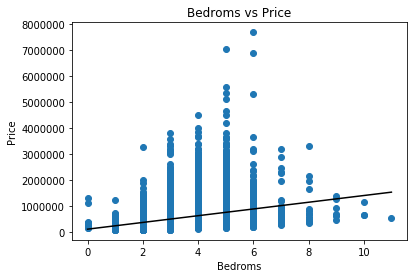

In [67]:
bedrooms = [[X.min()], [X.max()]]
plt.scatter(X, y)  
plt.plot(bedrooms, reg.predict(bedrooms),color='k')
plt.title('Bedroms vs Price')  
plt.xlabel('Bedroms')  
plt.ylabel('Price')  
plt.show()

# Multifeature regression

In [0]:
X = data_cleaned.iloc[:,3:]
y = data_cleaned.iloc[:,2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


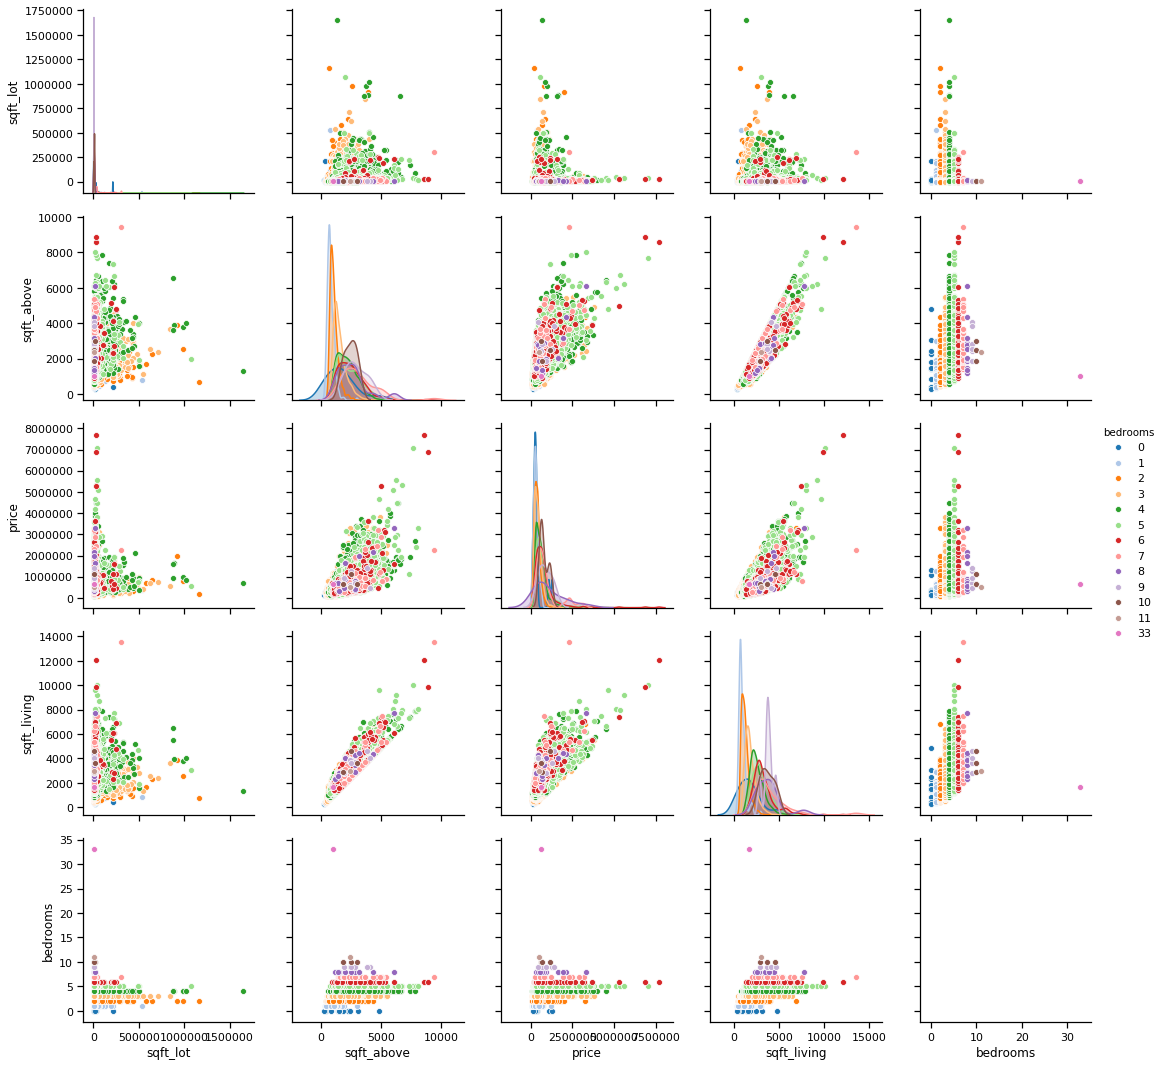

In [72]:
with sns.plotting_context("notebook"):
    sns.pairplot(data[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20', height=3)

In [0]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print('score: ', reg.score(X_test, y_test))

print('Coef     : ', reg.coef_)
print('Intercept: ', reg.intercept_)

y_pred = reg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

score:  0.6956188460756575
Coef     :  [-3.72135028e+04  4.35322277e+04  1.06116479e+02  1.27593583e-01
  4.63684698e+03  6.06716041e+05  5.01487697e+04  3.01962521e+04
  9.48399816e+04  7.08536176e+01  3.52628615e+01 -2.51667012e+03
  1.87530911e+01 -5.67989428e+02  6.07599228e+05 -2.19836195e+05
  2.49530971e+01 -3.54802816e-01]
Intercept:  4217082.05183458
Mean Absolute Error: 126401.31613305441
Mean Squared Error: 45691785047.0509
Root Mean Squared Error: 213756.3684362431
